# Computer Assignment of Communication Systems
# Dr. Pakravan
# MohammadParsa Dini   400101204
## HW1

# Q1

First, we will define the input to the channel:
Then we will plot it:
## part 1.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USER\AppData\Local\Temp\ipykernel_9540\3977108663.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("$x(t)=(t - T_0)^4 e^{-(t - T0)} \cos(2 \pi f_0 (t - T_0))^2 u(t-T_0)$")


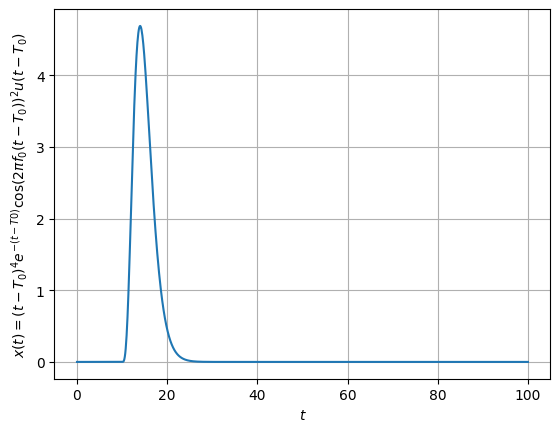

In [3]:
dt = 0.1
t = np.arange(0, 100.01, dt)
T0=10
f0=10
x_t = ((t - T0)**4) * (np.exp(-(t - T0))) * (np.cos(2 * np.pi * f0 * (t - T0))**2) * (t - T0>=0)
plt.plot(t,x_t)
plt.xlabel("$t$")
plt.ylabel("$x(t)=(t - T_0)^4 e^{-(t - T0)} \cos(2 \pi f_0 (t - T_0))^2 u(t-T_0)$")
plt.grid(True)

Firstly, we wil note that the frequency response of this channel is not an ideal pulse which is quite an issue. We have $Y(f) = X(f) H(f) = X(f) \sqcap(\frac{f}{2B}) e^{-j2\pi f t_d} ( 1 + k \cos(2\pi f T_0))$ which suggests: $y(t) = x(t-t_d) + \frac{k}{2} ( x(t-t_d - T_0) + x(t -t_d +T_0))$. And as you can see, the output is the summation of the input with delay $t_d$, with gain $k/2$ and delay $t_d - T_0$ and $t_d + T_0$. As we can see below, the signal $y(t)$ has been shifted towards right side. Furthermore, the signal has been distotred as well since the output has terms such as $  x(t-t_d - T_0)$ and $ x(t-t_d + T_0)$.



Attention : We set $B=35$ since we were not told about it specifically!

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\matplotlib\transforms.py:2855: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


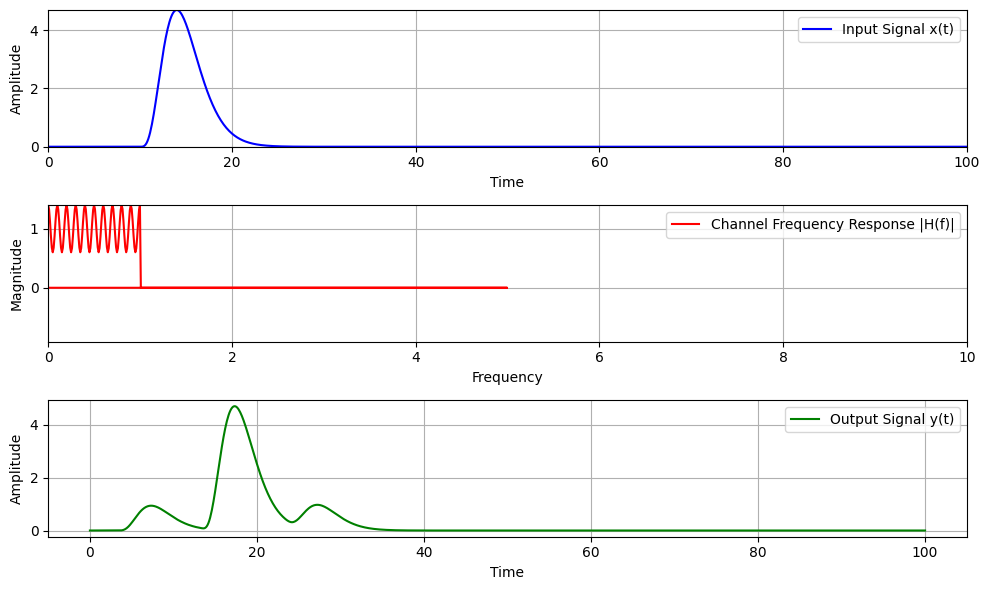

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the channel frequency response H(f)
def H(f, T0, k, td, B):
    condition = np.abs(f) <= B
    return np.where(condition, (1 + k * np.cos(2 * np.pi * f * T0)) * np.exp(-1j * 2 * np.pi * f * td), 0)

def H(fs, B):
    T0=10
    ys = []
    k=0.4
    td= T0/3
    for f in fs:
        if abs(f) <= B:
            y= (1+ k*np.cos(2*np.pi*f*T0))*np.exp((-1j)*2*np.pi*f*td)
            ys.append(y)
        else:
            ys.append(0)
    return np.array(ys)

# Parameters needed
T0 = 10
dt = 0.1
f0 = 10
B = 35
k = 0.4
td = T0 / 3.0
t = np.arange(0, 100.01, dt)                                                       # Time domain
x_t = ((t - T0)**4)*(np.exp(-(t-T0)))*(np.cos(2*np.pi*f0*(t - T0))**2)*(t - T0>=0) # Input signal x(t)


freqs = np.fft.fftfreq(len(t), dt)
H_f = H(freqs,1)                  # Channel frequency response H(f)
X_f = np.fft.fft(x_t)             # Fourier transform of input signal
Y_f = X_f * H_f                   # Multiply in frequency domain
y_t = np.fft.ifft(Y_f)            # Inverse Fourier transform to get output signal y(t)

# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, x_t, 'b', label='Input Signal x(t)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(0, 100)
plt.ylim(min(x_t), max(x_t))
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(freqs, np.abs(H_f), 'r', label='Channel Frequency Response |H(f)|')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()
plt.xlim(0, 10)
plt.ylim(min(H_f), max(H_f))
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, np.abs(y_t), 'g', label='Output Signal y(t)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## part 1.3

we have $y(t) - \alpha y(t- T_0) - \beta y(t- 2T_0) = x(t)$ which suggests: $H(f) = \frac{1}{1 - \alpha e^{-j2\pi fT_0} - \beta e^{-j2\pi f 2T_0}}$  
Here is the channel's reponse with $\alpha=0.3$ and $\beta = \sqrt{\frac{\pi}{2}}$

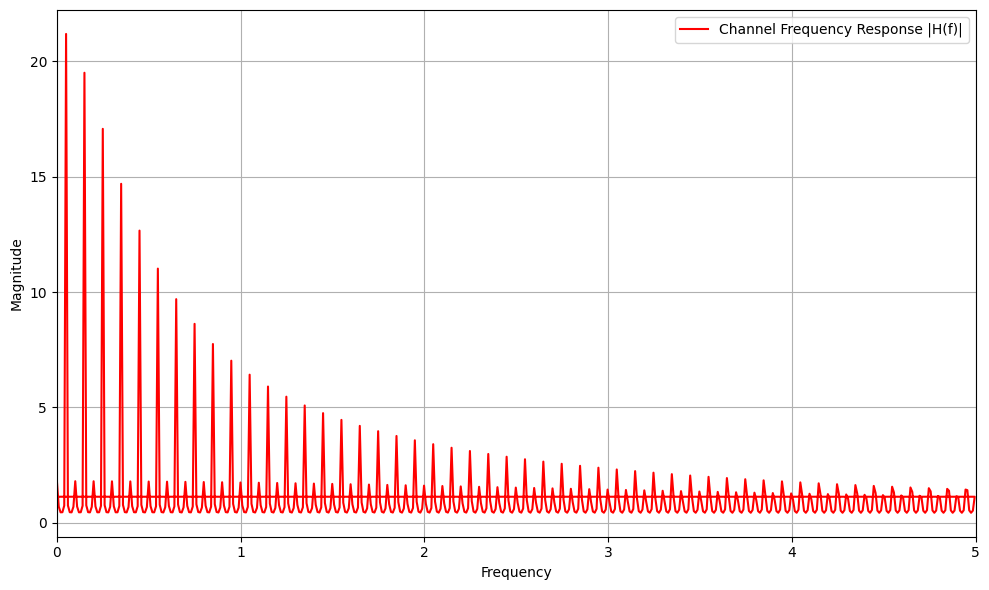

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Parameters needed
T0 = 10
dt = 0.1
f0 = 10
B = 35
k = 0.4
td = T0 / 3.0
def HH(f, alpha, beta):
  return 1/abs(1 - alpha*np.exp(-1j*2*np.pi*f*T0) - beta*np.exp(-1j*2*np.pi*f*2*T0))

plt.figure(figsize=(10, 6))
t = np.arange(0, 100.01, dt)
freqs = np.fft.fftfreq(len(t), dt)
H_ff = HH(freqs, 0.3, np.sqrt(np.pi / 2))
plt.plot(freqs, np.abs(H_ff), 'r', label='Channel Frequency Response |H(f)|')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()
plt.xlim(0, 5)
plt.grid(True)

plt.tight_layout()
plt.show()

## part 1.4

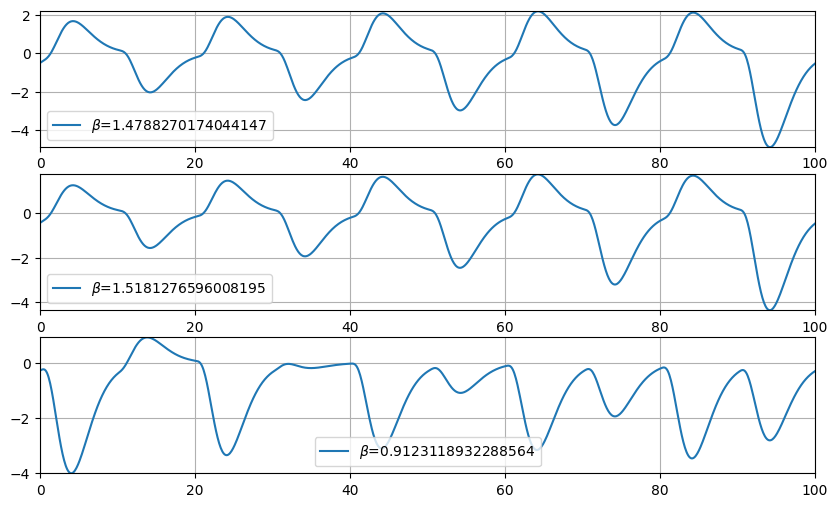

In [60]:
import numpy as np
import matplotlib.pyplot as plt
# Parameters
T0 = 10
f0 = 10
sigma = 1.0
N = 3
dt = 0.1
alpha = 0.3
# Time domain
t = np.arange(0, 100.1,dt)
freqs = np.fft.fftfreq(len(t), dt)
res = []
# Input signal x(t)
x_t = ((t - T0)**4)*(np.exp(-(t-T0)))*(np.cos(2*np.pi*f0*(t - T0))**2)*(t - T0>=0)
X_f = X=np.fft.fft(x_t)
plt.figure(figsize=(10, 6))
for i in range(1,N+1):
  beta=np.random.rayleigh(sigma)
  Y_f = X_f/(1-alpha*np.exp(-1j*2*np.pi*freqs*T0)-beta*np.exp(-1j*2*np.pi*freqs*2*T0))
  y_t = np.fft.ifft(Y_f)
  res.append(y_t)
  plt.subplot(3, 1, i)
  plt.plot(t,y_t,label=r"$\beta$="+ str(beta))
  plt.legend()
  plt.xlim(0, 100)
  plt.ylim(min(y_t), max(y_t))
  plt.grid(True)

As we can see the more $\beta$ increases, the more the output to then channel $y(t)$ gets distorted. in addition, the channel gets more non linear effects as well as the distortion.

However the parameter $\beta$ can attenuatethe signal differently with
$|H(f)|^2 = \frac{1}{1+ \alpha^2 + \beta^2 +2 \alpha \beta \cos(2\pi f t_0) - 2\alpha \cos(4\pi f t_0) - 2\beta \cos(4\pi f t_0)} $

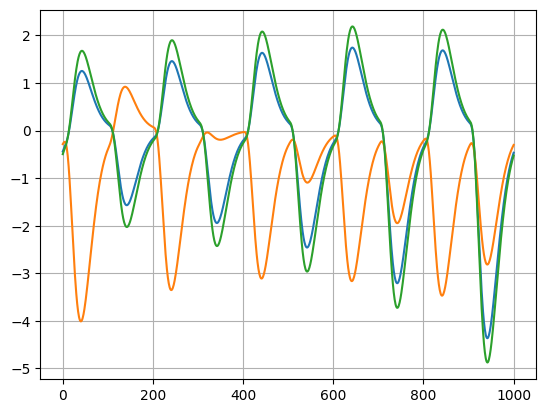

In [61]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(res[1])
plt.plot(res[2])
plt.plot(res[0])
plt.grid(True)

## part 1.5:

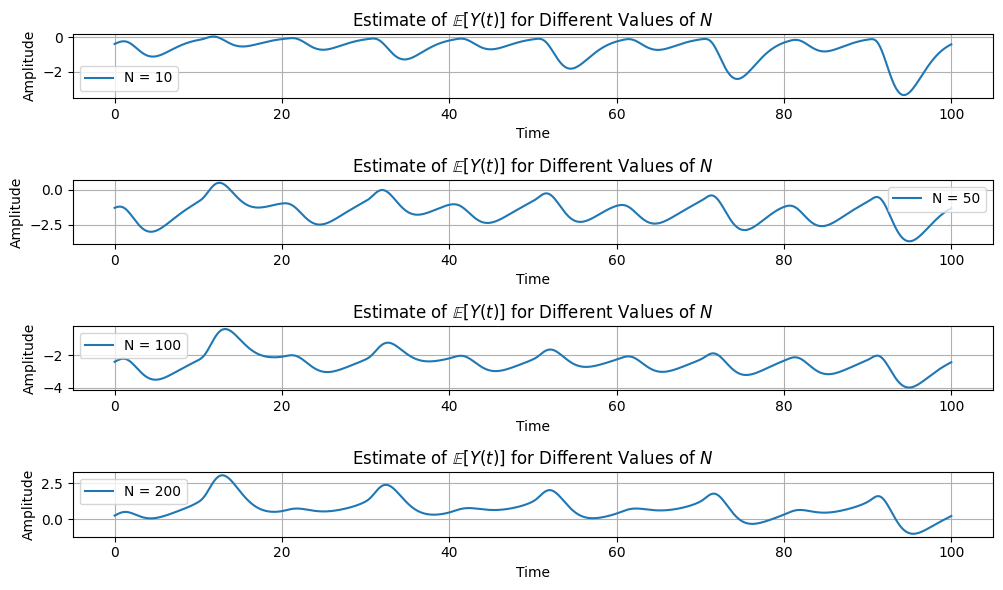

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T0 = 10
alpha = 0.3
sigma = 1.0
f0 = 10
dt = 0.1
N_values = [10, 50, 100, 200]
t = np.arange(0, 100.1, dt)
freqs = np.fft.fftfreq(len(t), dt)

# Input signal x(t)
x_t = ((t - T0)**4) * (np.exp(-(t - T0))) * (np.cos(2 * np.pi * f0 * (t - T0))**2) * (t - T0 >= 0)
X_f = np.fft.fft(x_t)

# Plotting
plt.figure(figsize=(10, 6))
for i, N in enumerate(N_values, start=1):
    beta_values = np.random.rayleigh(scale=sigma, size=N)
    Y_sum = np.zeros_like(x_t, dtype=complex)

    for j in range(N):
        beta = beta_values[j]
        Y_f = X_f / (1 - alpha * np.exp(-1j * 2 * np.pi * freqs * T0) - beta * np.exp(-1j * 2 * np.pi * freqs * 2 * T0))
        y_t = np.fft.ifft(Y_f)
        Y_sum += y_t

    Y_average = Y_sum / N
    plt.subplot(4, 1, i)
    plt.plot(t, Y_average.real, label=f'N = {N}')  # Plot the real part of Y_average

    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.title('Estimate of $\mathbb{E}[Y(t)]$ for Different Values of $N$')
    plt.grid(True)

plt.tight_layout()
plt.show()


# part 1.6
Not only it will distort the input and gives non linear effects, but also it will somehow make the output periodic.

# Q2

since $H(f) = ke^{-j 2\pi f T_0} $ and the chanenel's effect can be described as
$H_C (f) = 1 + e^{-j 2\pi f T_0}$. Hence, $H_{eq} (f) =H(f)/ H_C(f) =  \frac{ke^{-j 2\pi f T_0}}{ 1 + e^{-j 2\pi f T_0}}$ and its fourier expansion will be as:

$ \tilde{x}_m = k e^{-j 2\pi f T_0} (\sum_{n=0}^{\infty} (- γ)^n e^{ -j 2\pi nf T_0})$

## Note that the design is named the_design_m_tapped and it is present in the folder of the homework.

In [62]:
import numpy as np

T0 = 10
f0 = 10
k = 1
dt = 0.1
t = np.arange(0, 100.1, dt)
freqs = np.fft.fftfreq(len(t), dt)
gamma = 0.3
# Input signal x(t)
x_t = ((t - T0)**4) * (np.exp(-(t - T0))) * (np.cos(2 * np.pi * f0 * (t - T0))**2) * (t - T0 >= 0)
X_f = np.fft.fft(x_t)

# Frequency response of the channel
def H_C(f, gamma, T0):
    return 1 + gamma * np.exp(-1j * 2 * np.pi * f * T0)

# Taylor series expansion function
def taylor_series_approx(gamma, f, T0, m):
    H_eq = np.zeros_like(f, dtype=complex)
    for n in range(m):
        H_eq += ((-1) ** n) * (gamma ** n) * np.exp(-1j * 2 * np.pi * f * T0 * n)
        H_eq *= k * np.exp(-1j * 2 * np.pi * f * T0 )
    return H_eq

# Calculating coefficients and delays for m-Tapped-Delay Line Equalizer for m = 3 to 10
for m in range(3, 11):
    f = np.linspace(-5, 5, 1000)
    H_eq_approx = taylor_series_approx(gamma, f, T0, m)
    delays = np.argmax(np.abs(H_eq_approx))
    print("***************************************************************************************************")
    print(f"For m = {m}: Coefficients: {H_eq_approx}, Delays: {delays}")


***************************************************************************************************
For m = 3: Coefficients: [ 0.79      +4.65559654e-15j -0.24554064-7.50872688e-01j
 -0.63736657+4.66758888e-01j  0.64174164+4.60725154e-01j
  0.23844593-7.53155721e-01j -0.78996484+7.45291706e-03j
  0.2526135 +7.48522825e-01j  0.63293477-4.72751078e-01j
 -0.6460596 -4.54650414e-01j -0.23132999+7.55371720e-01j
  0.78985938-1.49051708e-02j -0.25966388-7.46106340e-01j
 -0.62844663+4.78701192e-01j  0.65032005+4.48535208e-01j
  0.22419346-7.57520489e-01j -0.78968361+2.23560979e-02j
  0.26669114+7.43623449e-01j  0.62390256-4.84608700e-01j
 -0.65452262-4.42380081e-01j -0.21703698+7.59601835e-01j
  0.78943756-2.98050352e-02j -0.27369467-7.41074373e-01j
 -0.61930296+4.90473076e-01j  0.65866694+4.36185581e-01j
  0.20986119-7.61615574e-01j -0.78912124+3.72513198e-02j
  0.28067384+7.38459339e-01j  0.61464825-4.96293798e-01j
 -0.66275264-4.29952258e-01j -0.20266671+7.63561526e-01j
  0.7887347 -4.46942

Fistly, we will depict the output where it goes through an ideal channel:

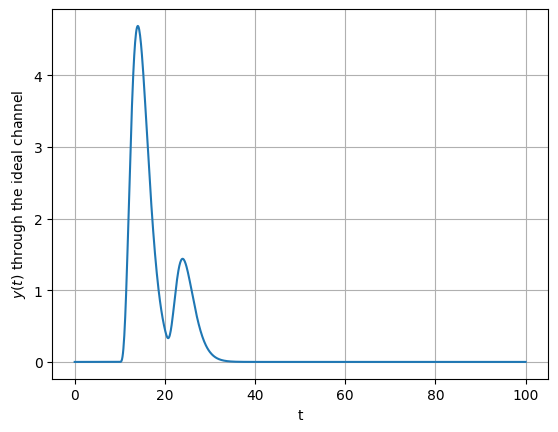

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad # fr numerical integration

T0 = 10
f0 = 10
dt = 0.1
t = np.arange(0, 100.1, dt)
freqs = np.fft.fftfreq(len(t), dt)
gamma = 0.3
# Input signal x(t)
x_t = ((t - T0)**4) * (np.exp(-(t - T0))) * (np.cos(2 * np.pi * f0 * (t - T0))**2) * (t - T0 >= 0)
X_f = np.fft.fft(x_t)

Y_f = X_f * (1 + gamma * np.exp(-1j*2*np.pi*freqs*T0)) # the ideal response
y_t = np.fft.ifft(Y_f)
plt.plot(t,y_t)
plt.xlabel("t")
plt.ylabel("$y(t)$ through the ideal channel")
plt.grid(True)

Now we will use the m-tapped method where the channel's effect is going to be calculated with finite number of its Mc.Lauran series and then we will compare $x(t)$ and $\tilde{x} (t) $ which is its approximation.

<>:24: SyntaxWarning: invalid escape sequence '\h'
<>:24: SyntaxWarning: invalid escape sequence '\h'
C:\Users\USER\AppData\Local\Temp\ipykernel_9540\3387689366.py:24: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$\hat{y}(t)$ and $y_{shifted}(t)$")


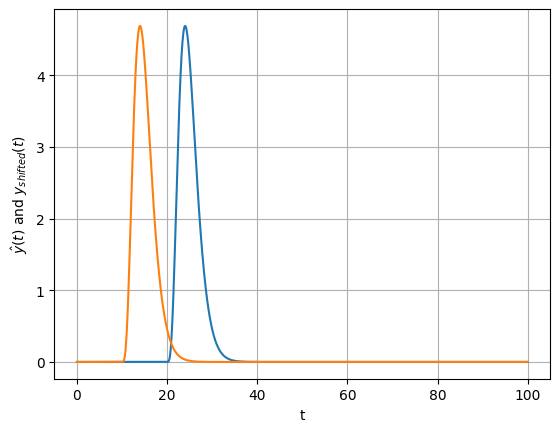

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad # fr numerical integration

T0 = 10
f0 = 10
dt = 0.1
t = np.arange(0, 100.1, dt)
freqs = np.fft.fftfreq(len(t), dt)
gamma = 0.3
# Input signal x(t)
x_t = ((t - T0)**4) * (np.exp(-(t - T0))) * (np.cos(2 * np.pi * f0 * (t - T0))**2) * (t - T0 >= 0)
X_f = np.fft.fft(x_t)

k = 1
t0 = 10
Yhat_f = X_f * k * np.exp(-1j*2*np.pi*freqs*t0)
yhat_t = np.fft.ifft(Yhat_f)
y_shifted_f = Y_f /(1 + gamma * np.exp(-1j*2*np.pi*freqs*T0))
y_shifted_t = np.fft.ifft(y_shifted_f)
plt.plot(t,yhat_t)
plt.plot(t,y_shifted_t)
plt.xlabel("t")
plt.ylabel("$\hat{y}(t)$ and $y_{shifted}(t)$")

plt.grid(True)

As we can see, the equalizer has done its job since we got our result from the versy first simulation!

C:\Users\USER\AppData\Local\Temp\ipykernel_9540\2987232720.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  err = float(sum( (x_tilde_t - yhat_t)**2))


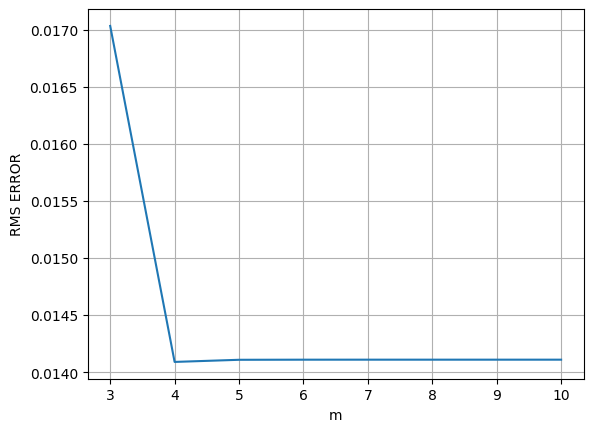

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad # fr numerical integration

k = 1
t0 = 10
T0 = 10
f0 = 10
dt = 0.1
t = np.arange(0, 100.1, dt)
freqs = np.fft.fftfreq(len(t), dt)
gamma = 0.3
x_t = ((t - T0)**4) * (np.exp(-(t - T0))) * (np.cos(2 * np.pi * f0 * (t - T0))**2) * (t - T0 >= 0)
X_f = np.fft.fft(x_t)

Yhat_f = X_f * k * np.exp(-1j*2*np.pi*freqs*t0)
yhat_t = np.fft.ifft(Yhat_f)
RMS = []
n= []
for m in range(3,11):
    n.append(m)
    X_tilde_f = Y_f * k *np.exp(-1j* 2 * np.pi * freqs * T0)
    X_tilde_f += Y_f * ((-gamma)**m) * np.exp(-1j * 2 * np.pi * (m-1) * freqs * T0)*k
    x_tilde_t = np.fft.ifft(X_tilde_f)
    err = float(sum( (x_tilde_t - yhat_t)**2))
    RMS.append(1/err)
    
plt.plot(n,RMS)
plt.xlabel("m")
plt.ylabel("RMS ERROR")
plt.grid(True)

As we can see as $m$ increases, the RMS error will shrink !